### Problem Statement

You are a data scientist / AI engineer working on a binary classification problem. You have been provided with a dataset named **`"mushroom_classification.csv"`**, which includes various features of mushrooms to predict whether they are edible or poisonous. The dataset comprises the following columns:

- `cap_diameter:` The diameter of the mushroom cap.
- `cap_shape:` The shape of the mushroom cap, encoded as integers.
- `gill_attachment:` The attachment of the gills, encoded as integers.
- `gill_color:` The color of the gills, encoded as integers.
- `stem_height:` The height of the mushroom stem.
- `stem_width` The width of the mushroom stem.
- `stem_color:` The color of the mushroom stem, encoded as integers.
- `season:` The season when the mushroom was found, encoded as integers.
- `class:` The classification of the mushroom, where 0 indicates edible and 1 indicates poisonous.

Your task is to use this dataset to build and evaluate a binary classification model to classify mushrooms as edible or poisonous. You will start with basic models and gradually move towards advanced models like Gradient Boosting. Finally, you will explore various parameters of the Gradient Boosting model to enhance performance.

**Dataset credits:** Prisha Sawhney (https://www.kaggle.com/datasets/prishasawhney/mushroom-dataset/data)

In [1]:
import pandas as pd

### Data Preparation and Exploration

In [5]:
df = pd.read_csv("mushroom_classification.csv")
df.shape

(54035, 9)

In [7]:
df.head()

,cap_diameter,cap_shape,gill_attachment,gill_color,stem_height,stem_width,stem_color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


### Exploratory Data Analysis (EDA)

In [15]:
g = df.groupby("class")[["cap_diameter", "stem_height", "stem_width"]].mean()
g

,cap_diameter,stem_height,stem_width
class,,,
0,633.064696,0.627374,1208.915189
1,513.236293,0.867251,921.516563


# Visualization

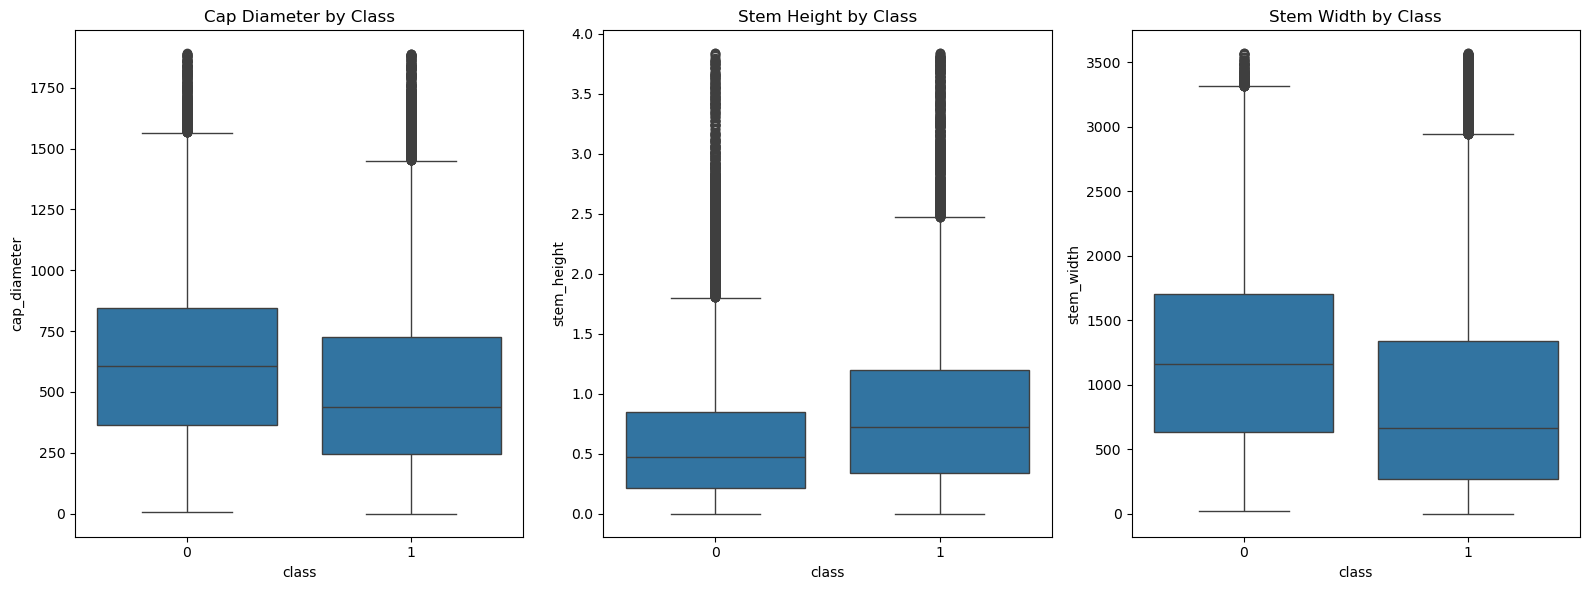

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 6))

# Boxplot for 'cap_diameter'
plt.subplot(1, 3, 1)
sns.boxplot(data=df, x="class", y="cap_diameter")
plt.title("Cap Diameter by Class")

# Boxplot for 'stem_height'
plt.subplot(1, 3, 2)
sns.boxplot(data=df, x="class", y="stem_height")
plt.title("Stem Height by Class")

# Boxplot for 'stem_width'
plt.subplot(1, 3, 3)
sns.boxplot(data=df, x="class", y="stem_width")
plt.title("Stem Width by Class")

plt.tight_layout()  # Adjusts the layout to make sure everything fits
plt.show()

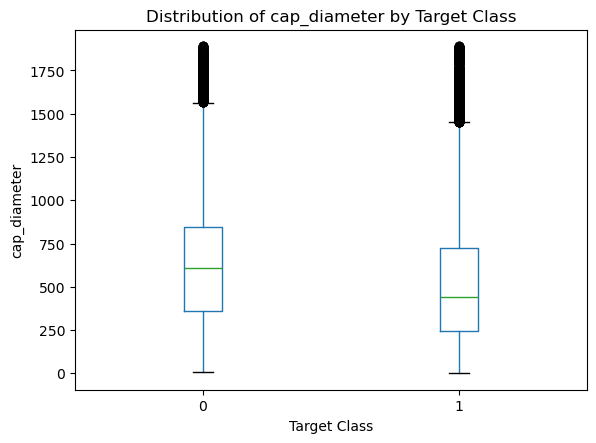

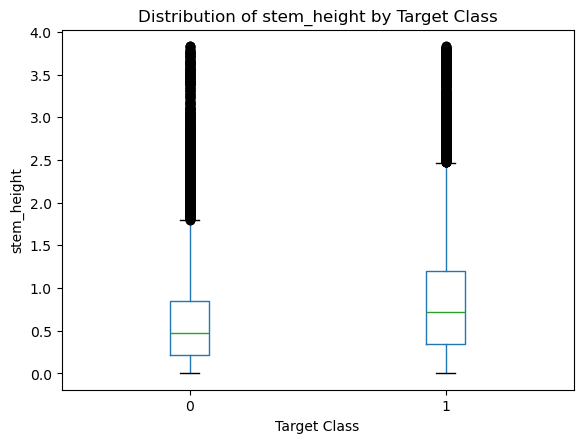

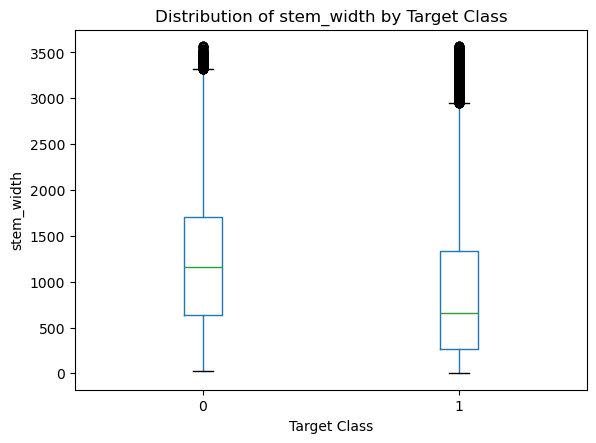

In [29]:
features_to_analyze = ['cap_diameter', 'stem_height', 'stem_width']

for feature in features_to_analyze:
    df.boxplot(column=feature, by='class', grid=False)
    plt.title(f'Distribution of {feature} by Target Class')
    plt.suptitle('')  # Suppress the default title to avoid overlap
    plt.xlabel('Target Class')
    plt.ylabel(feature)
    plt.show()

# Train - test Split

In [31]:
from sklearn.model_selection import train_test_split

X = df.drop('class', axis=1) 
y = df['class']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train Logistic Regression Model

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.61      0.55      0.58      6130
           1       0.66      0.71      0.68      7379

    accuracy                           0.64     13509
   macro avg       0.63      0.63      0.63     13509
weighted avg       0.64      0.64      0.64     13509



C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Train Decision Tree Classifier

In [37]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      6130
           1       0.98      0.98      0.98      7379

    accuracy                           0.98     13509
   macro avg       0.98      0.97      0.97     13509
weighted avg       0.98      0.98      0.98     13509



# Train Gradient Boosting Classifier

In [46]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      6130
           1       0.89      0.89      0.89      7379

    accuracy                           0.88     13509
   macro avg       0.88      0.88      0.88     13509
weighted avg       0.88      0.88      0.88     13509



# Calculate and display the feature importances

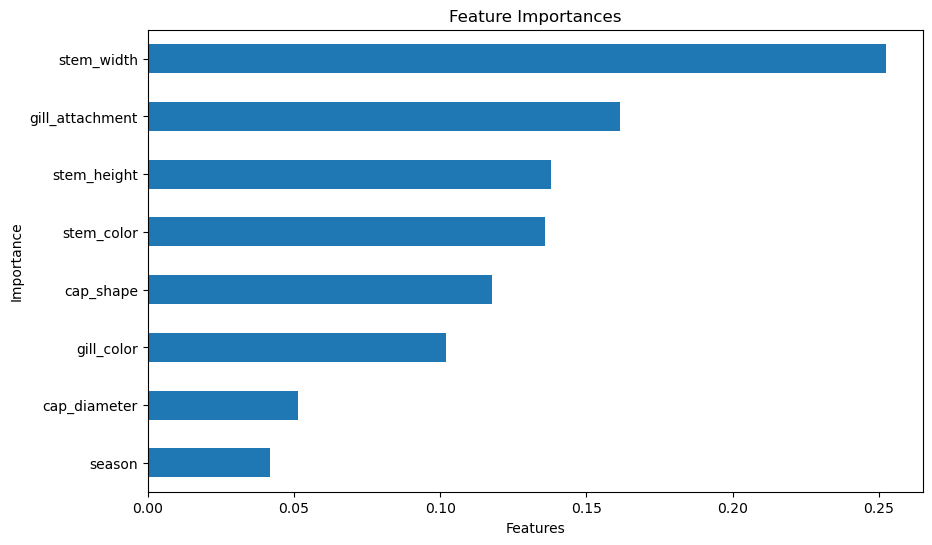

In [51]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values().plot(kind='barh', figsize=(10, 6))
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

### Exploring Various Parameters in Gradient Boosting Classifier

In [53]:
model = GradientBoostingClassifier(learning_rate = 0.05, n_estimators = 150, max_depth=4, min_samples_split = 3, min_samples_leaf = 2)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      6130
           1       0.92      0.90      0.91      7379

    accuracy                           0.90     13509
   macro avg       0.90      0.91      0.90     13509
weighted avg       0.91      0.90      0.90     13509



# Conclusion

Logistic Regression:
Accuracy: 0.64

Decision Tree Classifier:
Accuracy: 0.97

Gradient Boosting Classifier:

Accuracy with Default Parameters: 0.88
Accuracy with Custom Parameters: 0.90

The Decision Tree Classifier and the Gradient Boosting model with custom parameters both demonstrated strong performance.